## [教學目標]

綜合到目前為止所教的內容, 提交一次作答結果吧!!

## [範例重點]

1. ### 資料清理 (In[4], Out[4])

2. ### 前處理 : MinMaxScaler, Imputer (In[4], Out[4])

3. ### Heatmap 的進階用法 : 散佈圖, KDE, 密度圖 (In[6], Out[6])

4. ### 輸出值的紀錄 (In[8], Out[8])

In [1]:
# 載入需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # 另一個繪圖-樣式套件
plt.style.use('ggplot')

# 忽略警告訊息
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# 種類 2 種以下的類別型欄位轉標籤編碼 (Label Encoding)
from sklearn.preprocessing import LabelEncoder

# 縮放器 : 設定特徵縮放到 0~1 區間
# 填補器載入各欄中位數
from sklearn.preprocessing import MinMaxScaler, Imputer

## 仿造之前做過的處理

In [2]:
# 設定 data_path
dir_data = '/Users/johnsonhuang/py_ds/ML_100/2nd-ML100Days/homework/data/Part01/'
f_app_train = os.path.join(dir_data, 'application_train.csv')
f_app_test = os.path.join(dir_data, 'application_test.csv')

# 讀取檔案
app_train = pd.read_csv(f_app_train)
app_test = pd.read_csv(f_app_test)

# 種類 2 種以下的類別型欄位轉標籤編碼 (Label Encoding)

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

le_count = 0

# 標籤編碼 (2種類別) 欄位轉 One Hot Encoding            

app_train = pd.get_dummies(app_train)

In [3]:
# 種類 2 種以下的類別型欄位轉標籤編碼 (Label Encoding)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le_count = 0

# 檢查每一個 column
for col in app_train:
    if app_train[col].dtype == 'object':
        # 如果只有兩種值的類別型欄位
        if len(list(app_train[col].unique())) <= 2:
            # 就做 Label Encoder
            le.fit(app_train[col])
            app_train[col] = le.transform(app_train[col])
            app_test[col] = le.transform(app_test[col])
            
            # 紀錄有多少個 columns 被標籤編碼過
            le_count += 1
            
# 標籤編碼 (2種類別) 欄位轉 One Hot Encoding            
app_train = pd.get_dummies(app_train)
app_test = pd.get_dummies(app_test)

In [4]:
# 受雇日數為異常值的資料, 另外設一個欄位記錄, 並將異常的日數轉成空值 (np.nan)
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)
app_test['DAYS_EMPLOYED_ANOM'] = app_test["DAYS_EMPLOYED"] == 365243
app_test["DAYS_EMPLOYED"].replace({365243: np.nan}, inplace = True)

# 出生日數 (DAYS_BIRTH) 取絕對值 
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])
app_test['DAYS_BIRTH'] = abs(app_test['DAYS_BIRTH'])

## 做好前處理

### 開始擬合模型之前，我們要確保 training & testing data 的欄位數量一致，

> ## 原因是因為 One hot encoding 會製造多的欄位，有些類別出現在 training data 而沒有出現 testing data 中，我們就要把這些多餘的欄位去除


### [pandas align() function : illustrative example](https://stackoverflow.com/questions/51645195/pandas-align-function-illustrative-example) 

DataFrame.align doesn't combine two dataframes, 

rather it aligns them so that the two dataframes have the same row and/or column configuration


In [5]:
train_labels = app_train['TARGET']

# 調整欄位數, 移除出現在 training data 而沒有出現 testing data 中的欄位
app_train, app_test = app_train.align(app_test, join = 'inner', axis = 1)

# scaler 縮放器 : 設定特徵縮放到 0~1 區間，縮放器載入 train 的上下限(fit), 對 train, test 進行縮放轉換(transform)

# imputer 填補器 : 填補器載入各欄中位數(fit), 將中位數回填 train, test 資料中的空缺值(transform)

from sklearn.preprocessing import MinMaxScaler, Imputer


# 填補器載入各欄中位數, 將中位數回填 train, test 資料中的空缺值

imputer.fit(train)

train = imputer.transform(train)


# 縮放器 : 設定特徵縮放到 0~1 區間
scaler = MinMaxScaler(feature_range = (0, 1))

# 縮放器載入 train 的上下限, 對 train, test 進行縮放轉換

scaler.fit(train)

train = scaler.transform(train)

In [6]:
# scaler 縮放器 : 設定特徵縮放到 0~1 區間，縮放器載入 train 的上下限(fit), 對 train, test 進行縮放轉換(transform)
# imputer 填補器 : 填補器載入各欄中位數(fit), 將中位數回填 train, test 資料中的空缺值(transform)
from sklearn.preprocessing import MinMaxScaler, Imputer


# 特徵欄位清單
train = app_train
features = list(train.columns)

# 複製 test 資料
test = app_test.copy()



# 填補器 : 設定缺失值補中位數
imputer = Imputer(strategy = 'median')

# 填補器載入各欄中位數
imputer.fit(train)

# 將中位數回填 train, test 資料中的空缺值
train = imputer.transform(train)
test = imputer.transform(app_test)



# 縮放器 : 設定特徵縮放到 0~1 區間
scaler = MinMaxScaler(feature_range = (0, 1))

# 縮放器載入 train 的上下限, 對 train, test 進行縮放轉換
scaler.fit(train)
train = scaler.transform(train)
test = scaler.transform(test)

print('Training data shape: ', train.shape)
print('Testing data shape: ', test.shape)

Training data shape:  (307511, 240)
Testing data shape:  (48744, 240)


## Day_016 zlintsai・2019/05/01 23:26 提問

-------
### [Day016: data_test rescaling problem](https://www.cupoy.com/qa/kwassist/ai_tw/0000016A7400D52E0000012A6375706F795F72656C656173655155455354)

這樣看似合理，但是正規的機器學習理論上是不允許你使用任何 test data 的資訊，test data 只能用來做最後的測試，因為實務上在應用時，測試資料通常數量都很小，這時任何統計量都有可能帶來偏誤。



另外補充史丹佛 cs231n 課程中提到的內容給你參考
![image](http://kwassistfile.cupoy.com/0000016A7655D5B3000005E56375706F795F72656C65617365414E53/1545817738468/large)


這是機器學習中很容易犯的錯誤，有些公司也會問類似這樣的問題來評估面試者，請務必記得這個概念喔！



## Fit the model

In [7]:
from sklearn.linear_model import LogisticRegression

# 設定模型與模型參數
log_reg = LogisticRegression(C = 0.0001)

# 使用 Train 資料訓練模型
log_reg.fit(train, train_labels)

LogisticRegression(C=0.0001, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

### 模型 fit 好以後，就可以用來預測 testing data 中的客戶違約遲繳貸款的機率囉! 

### (記得要用 predict_proba 才會輸出機率)

In [8]:
log_reg.predict_proba(test)

array([[0.93494885, 0.06505115],
       [0.87359914, 0.12640086],
       [0.91876117, 0.08123883],
       ...,
       [0.94297619, 0.05702381],
       [0.92586477, 0.07413523],
       [0.91016771, 0.08983229]])

In [9]:
# 用模型預測結果
# 請注意羅吉斯迴歸是分類預測 (會輸出 0 的機率, 與 1 的機率), 而我們只需要留下 1 的機率這排
log_reg_pred = log_reg.predict_proba(test)[:, 1]

In [10]:
log_reg_pred

array([0.06505115, 0.12640086, 0.08123883, ..., 0.05702381, 0.07413523,
       0.08983229])

## 儲存預測結果

In [11]:
# 計算提交結果
submit = app_test[['SK_ID_CURR']]
submit['TARGET'] = log_reg_pred

submit.head()

,SK_ID_CURR,TARGET
0,100001,0.065051
1,100005,0.126401
2,100013,0.081239
3,100028,0.061509
4,100038,0.128308


In [12]:
submit.to_csv("Day_016_HW_submit_1.csv", sep = ',', encoding = 'utf-8', index = False)

練習時間
將你的結果存成 csv, 上傳你的第一份 Kaggle 成績

Hints: https://stackoverflow.com/questions/16923281/pandas-writing-dataframe-to-csv-file

In [14]:
# ![image]("/Users/johnsonhuang/py_ds/ML_100/2nd-ML100Days/homework/Day_016_HW/submit.png")
# 並不是上述這樣寫

"""
![image](attachment:submit.png)
"""

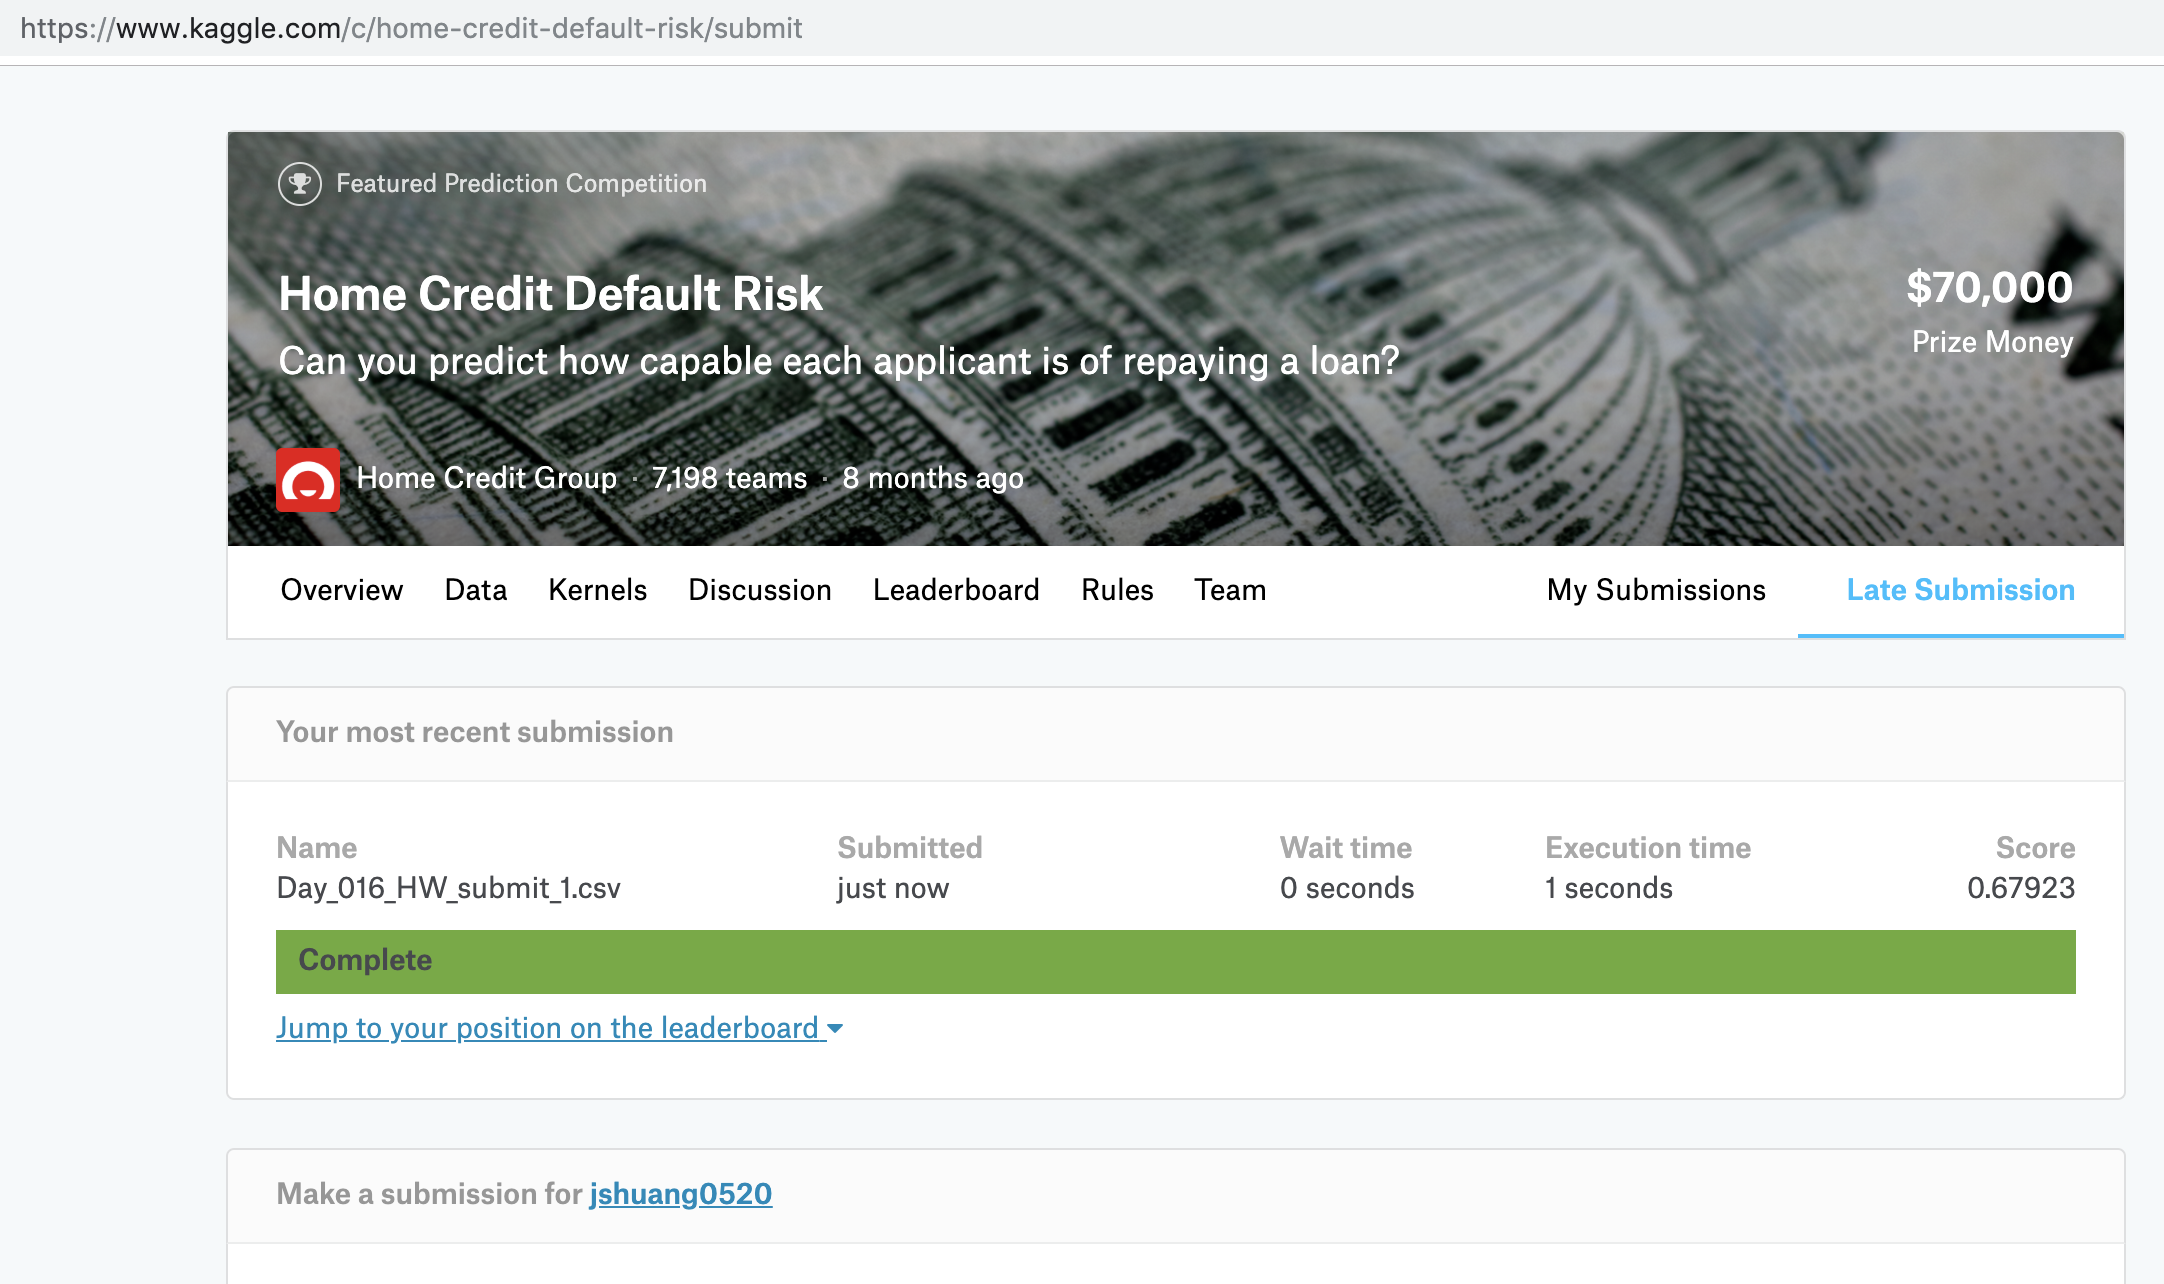